# Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
sales = pd.read_csv("sales_data_sample.csv", encoding="latin1")
sales.columns = sales.columns.str.lower()
sales.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium



## Hypotheses

- **H1:** Average sales differ between countries.
- **H2:** Product lines have significantly different average sales.
- **H3:** Orders with 'Shipped' status generate higher revenue.
- **H4:** There is a seasonal (monthly/quarterly) pattern in sales volume.

---


In [3]:
sales.info()

sales[['country', 'productline', 'status']].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  phone             2823 non-null   object 
 15  addressline1      2823 non-null   object 
 16  addressline2      302 non-null    object 


country        19
productline     7
status          6
dtype: int64

In [4]:
sales.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,qtr_id,month_id,year_id,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [5]:
sales.isnull().sum()

ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

In [6]:
len(sales) == len(sales.drop_duplicates())

True

In [7]:
sales.loc[sales['territory'].isnull()]['country'].unique()

array(['USA', 'Canada'], dtype=object)

In [8]:
sales['territory'] = sales['territory'].fillna('NAM')
sales['territory'].unique()

array(['NAM', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [9]:
sales['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [10]:
sales1 = sales[~((sales['status'] == 'Cancelled') | (sales['status'] == 'On Hold'))]
sales1['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Resolved'], dtype=object)

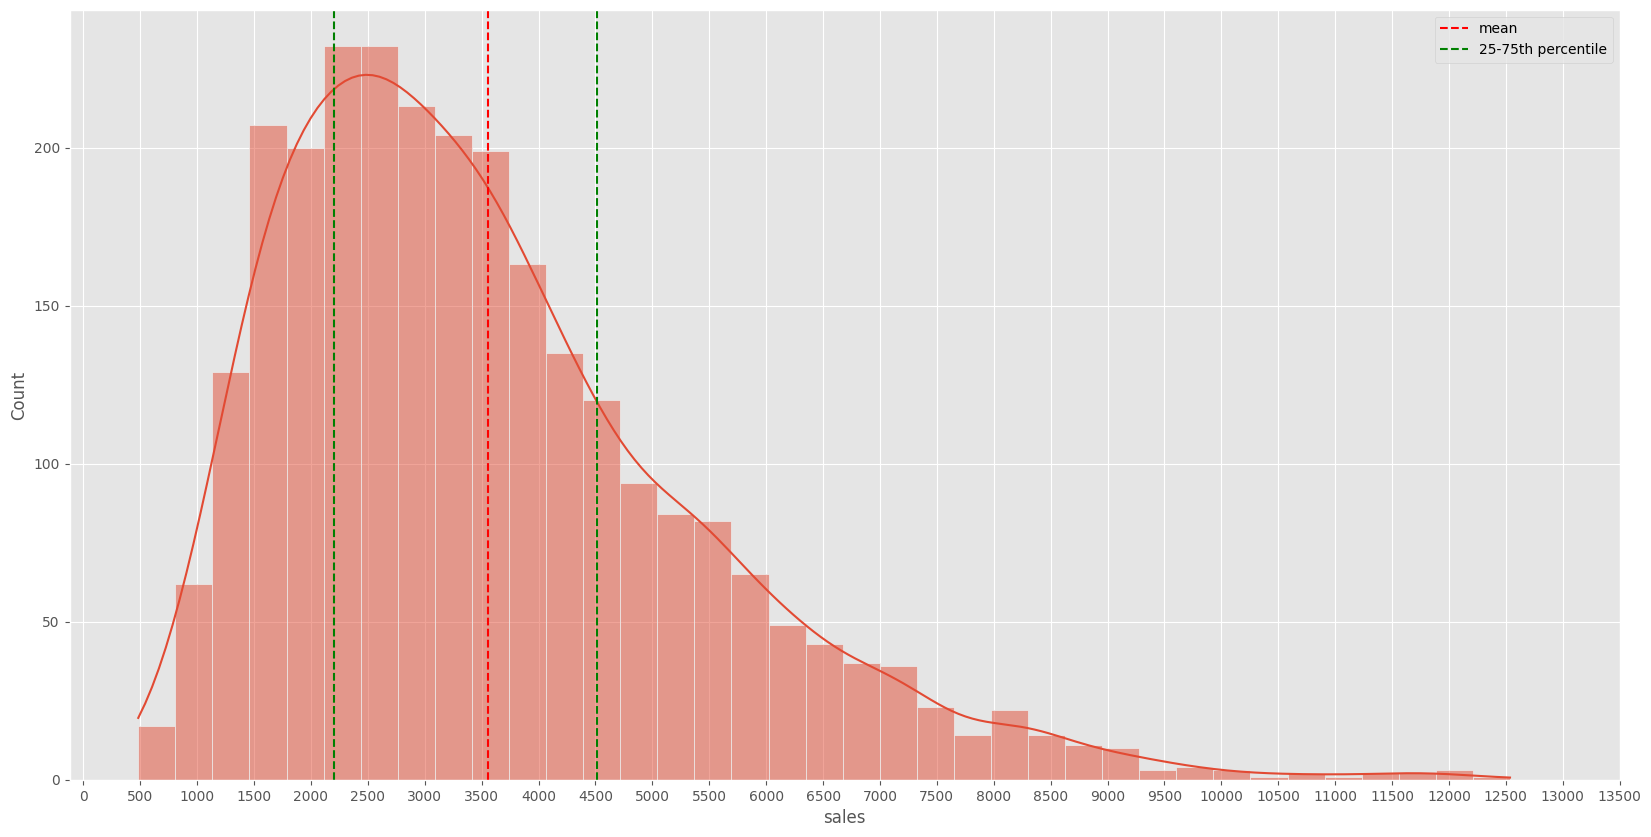

In [11]:

plt.figure(figsize=(20,10))
sns.histplot(sales1['sales'], kde=True)
plt.axvline(x = np.mean(sales1['sales']), c = 'red', ls = '--', label = 'mean')
plt.axvline(x = np.percentile(sales1['sales'], 25), c = 'green', ls = '--', label = '25-75th percentile')
plt.axvline(x = np.percentile(sales1['sales'], 75), c = 'green', ls = '--')
plt.xticks(np.arange(0,14000,500))
plt.legend()
plt.show()

<span style="font-size:18px;">Sales distribution is right skewed. Most of the sales are between 2000-2500. Mean sale is around 3500. </span>

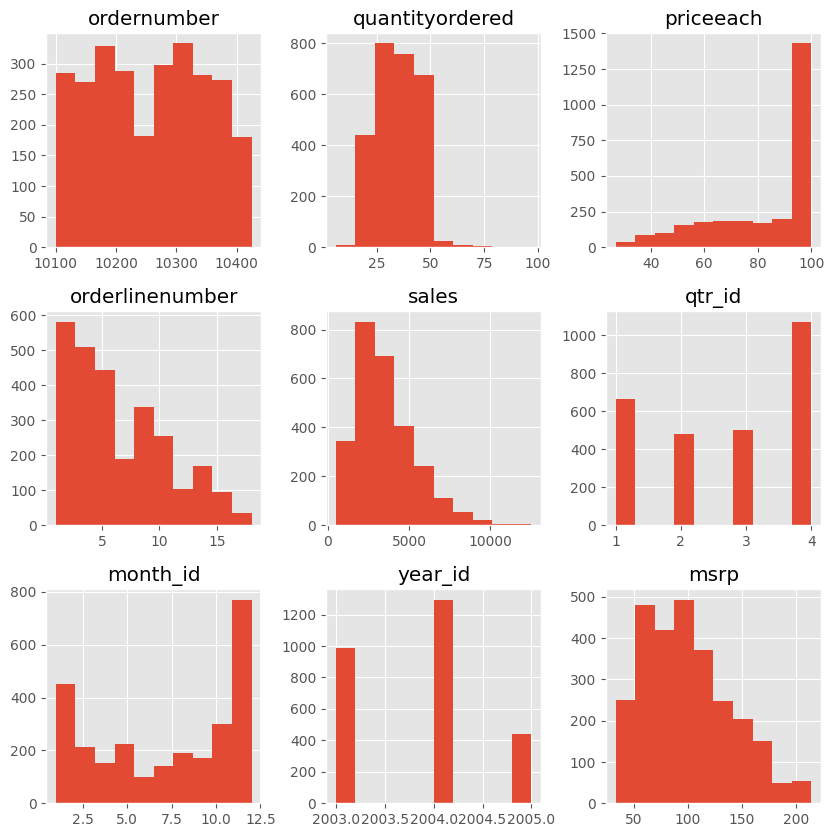

In [12]:
sales1.hist(figsize = (10,10))
plt.show()

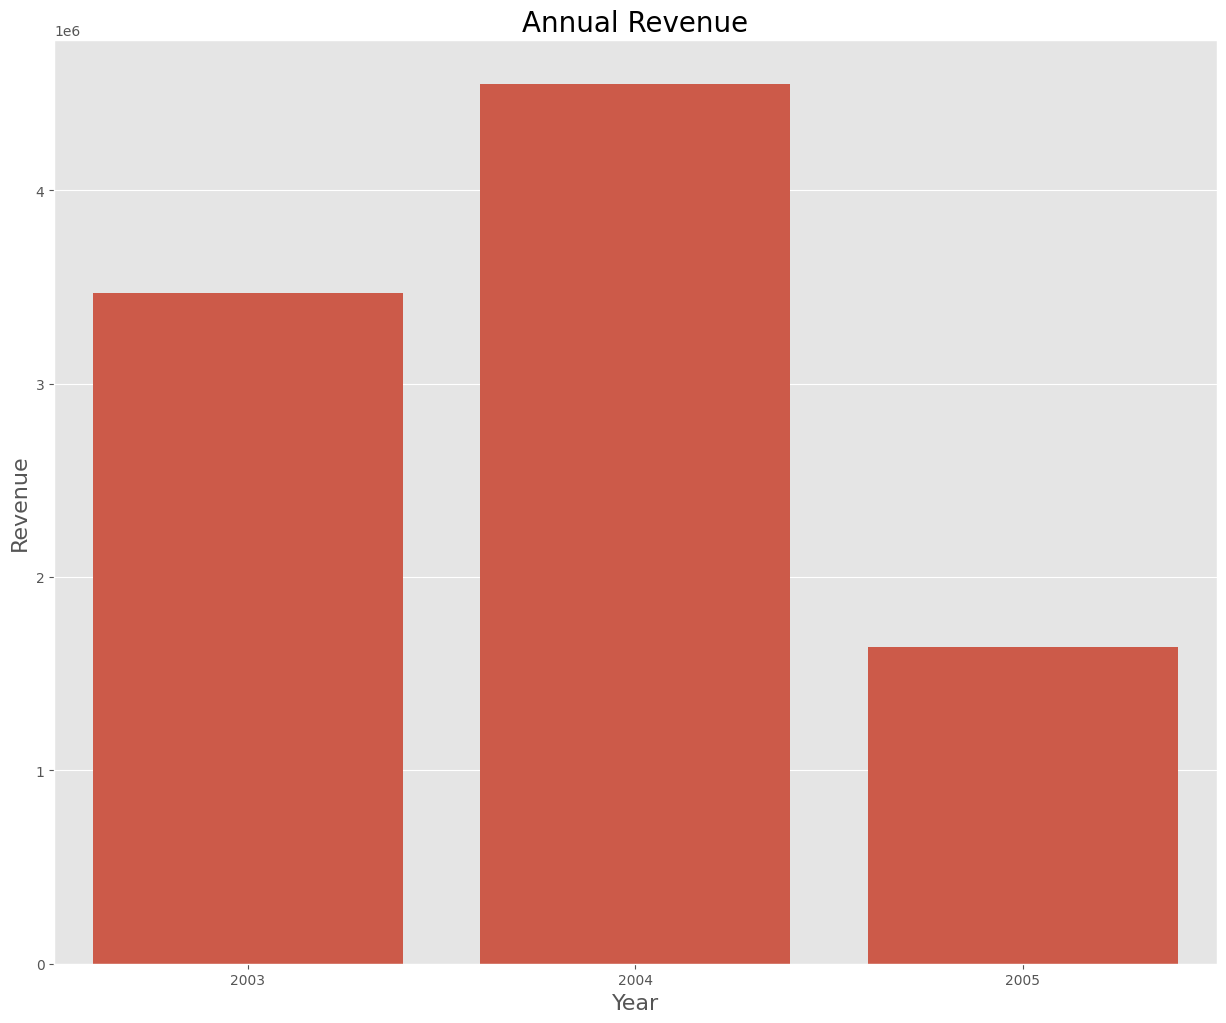

In [13]:
plt.figure(figsize=(15,12))

yearly_revenue = sales1.groupby(['year_id'])['sales'].sum().reset_index()
sns.barplot(x="year_id", y="sales", data=yearly_revenue)

plt.title('Annual Revenue', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

<span style="font-size:18px;">Sales are increased from 2003 to 2004. Sales at 2005 is least but it doesn't contain whole year data.</span>

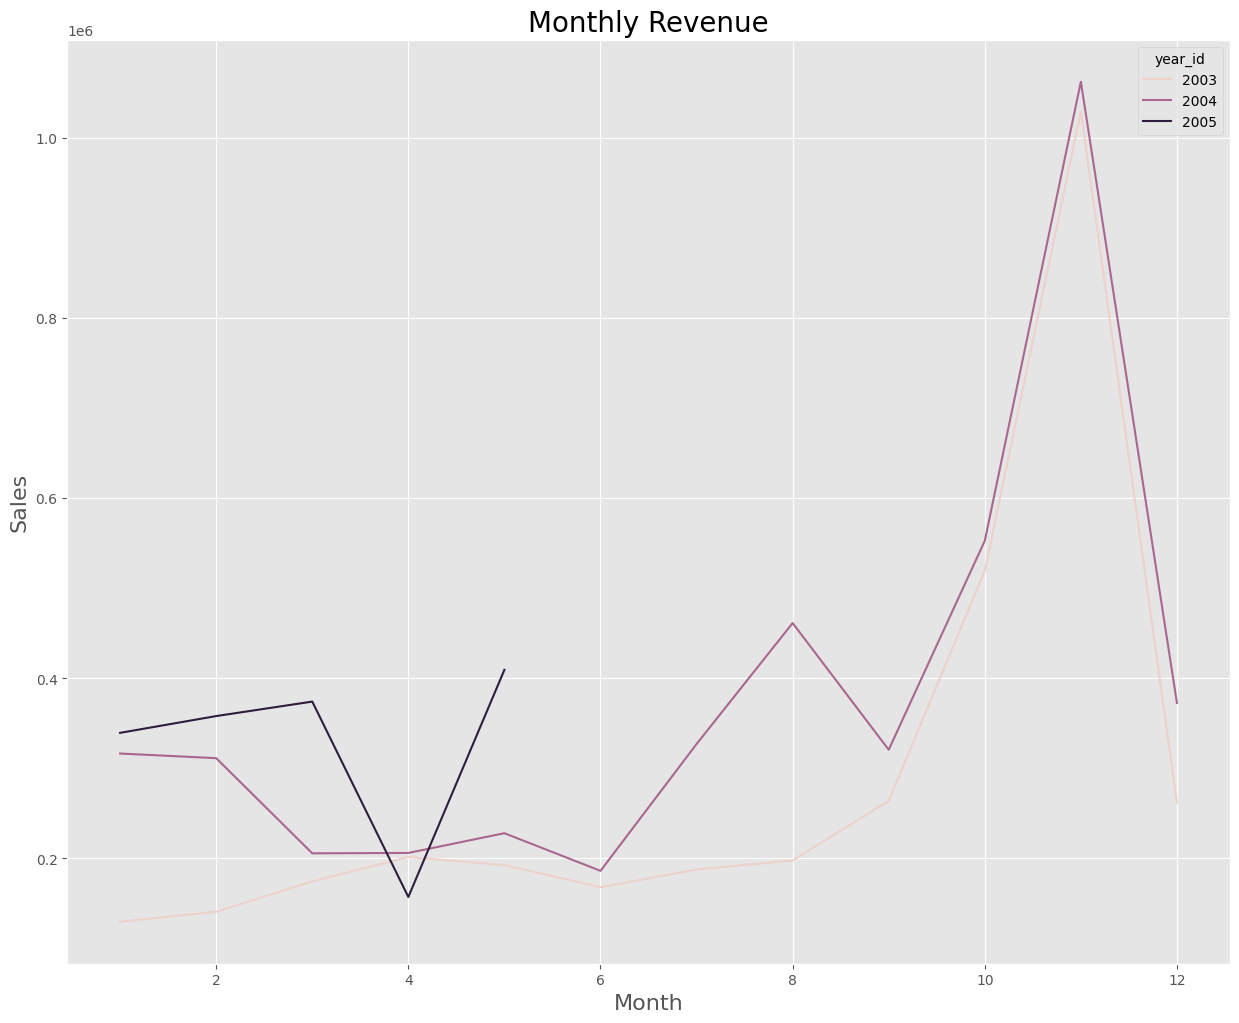

In [14]:
plt.figure(figsize=(15,12))

monthly_revenue = sales1.groupby(['year_id','month_id'])['sales'].sum().reset_index()

sns.lineplot(x="month_id", y="sales",hue="year_id", data=monthly_revenue)
plt.title('Monthly Revenue', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)

plt.show()

<span style="font-size:18px;">2005 sales for the first 5 months are higher than previous years except for April. The monthly sales trends at peaked on November.</span>

In [15]:
sales1 = sales[sales['productline'] == 'Classic Cars'].copy()
sales1['discountrate'] = ((sales1['msrp'] - sales1['priceeach']) / sales1['msrp']) * 100

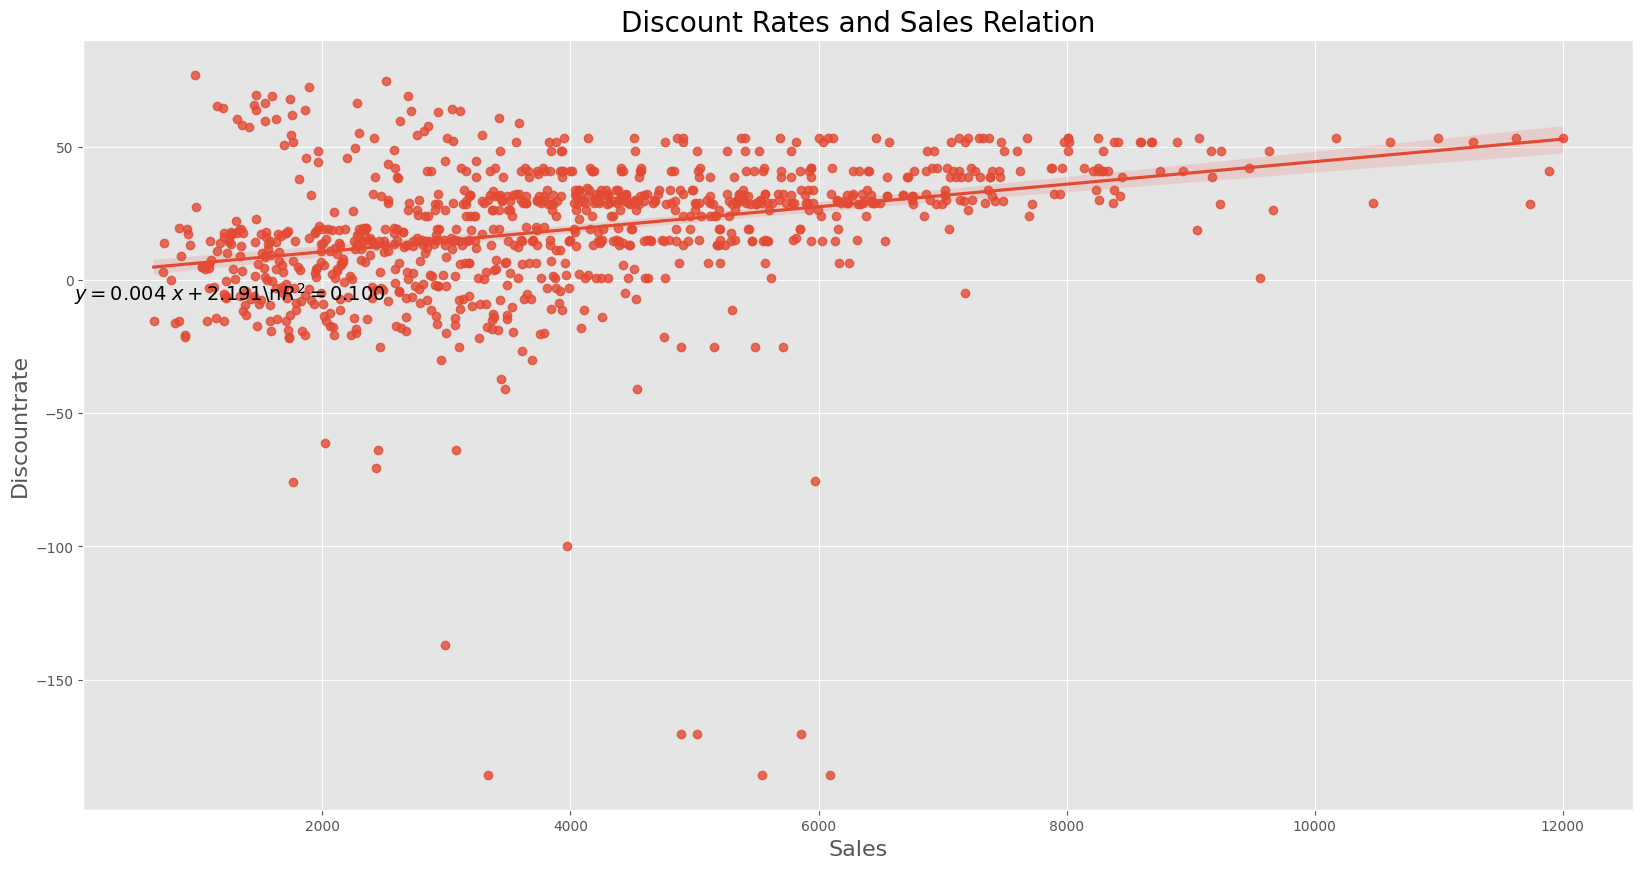

In [16]:
from sklearn.metrics import r2_score

plt.figure(figsize=(20,10))
sns.regplot(x = sales1['sales'], y = sales1['discountrate'])
plt.title('Discount Rates and Sales Relation', fontsize = 20)
plt.ylabel('Discountrate', fontsize = 16)
plt.xlabel('Sales', fontsize = 16)


x = sales1['sales']
y = sales1['discountrate']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

text = fr"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,p(x)):0.3f}$"
plt.gca().text(0.05, 0.05, text, fontsize=14, verticalalignment='top')
plt.show()

<span style="font-size:18px;">There is no relationship between discount rates and sales.</span>

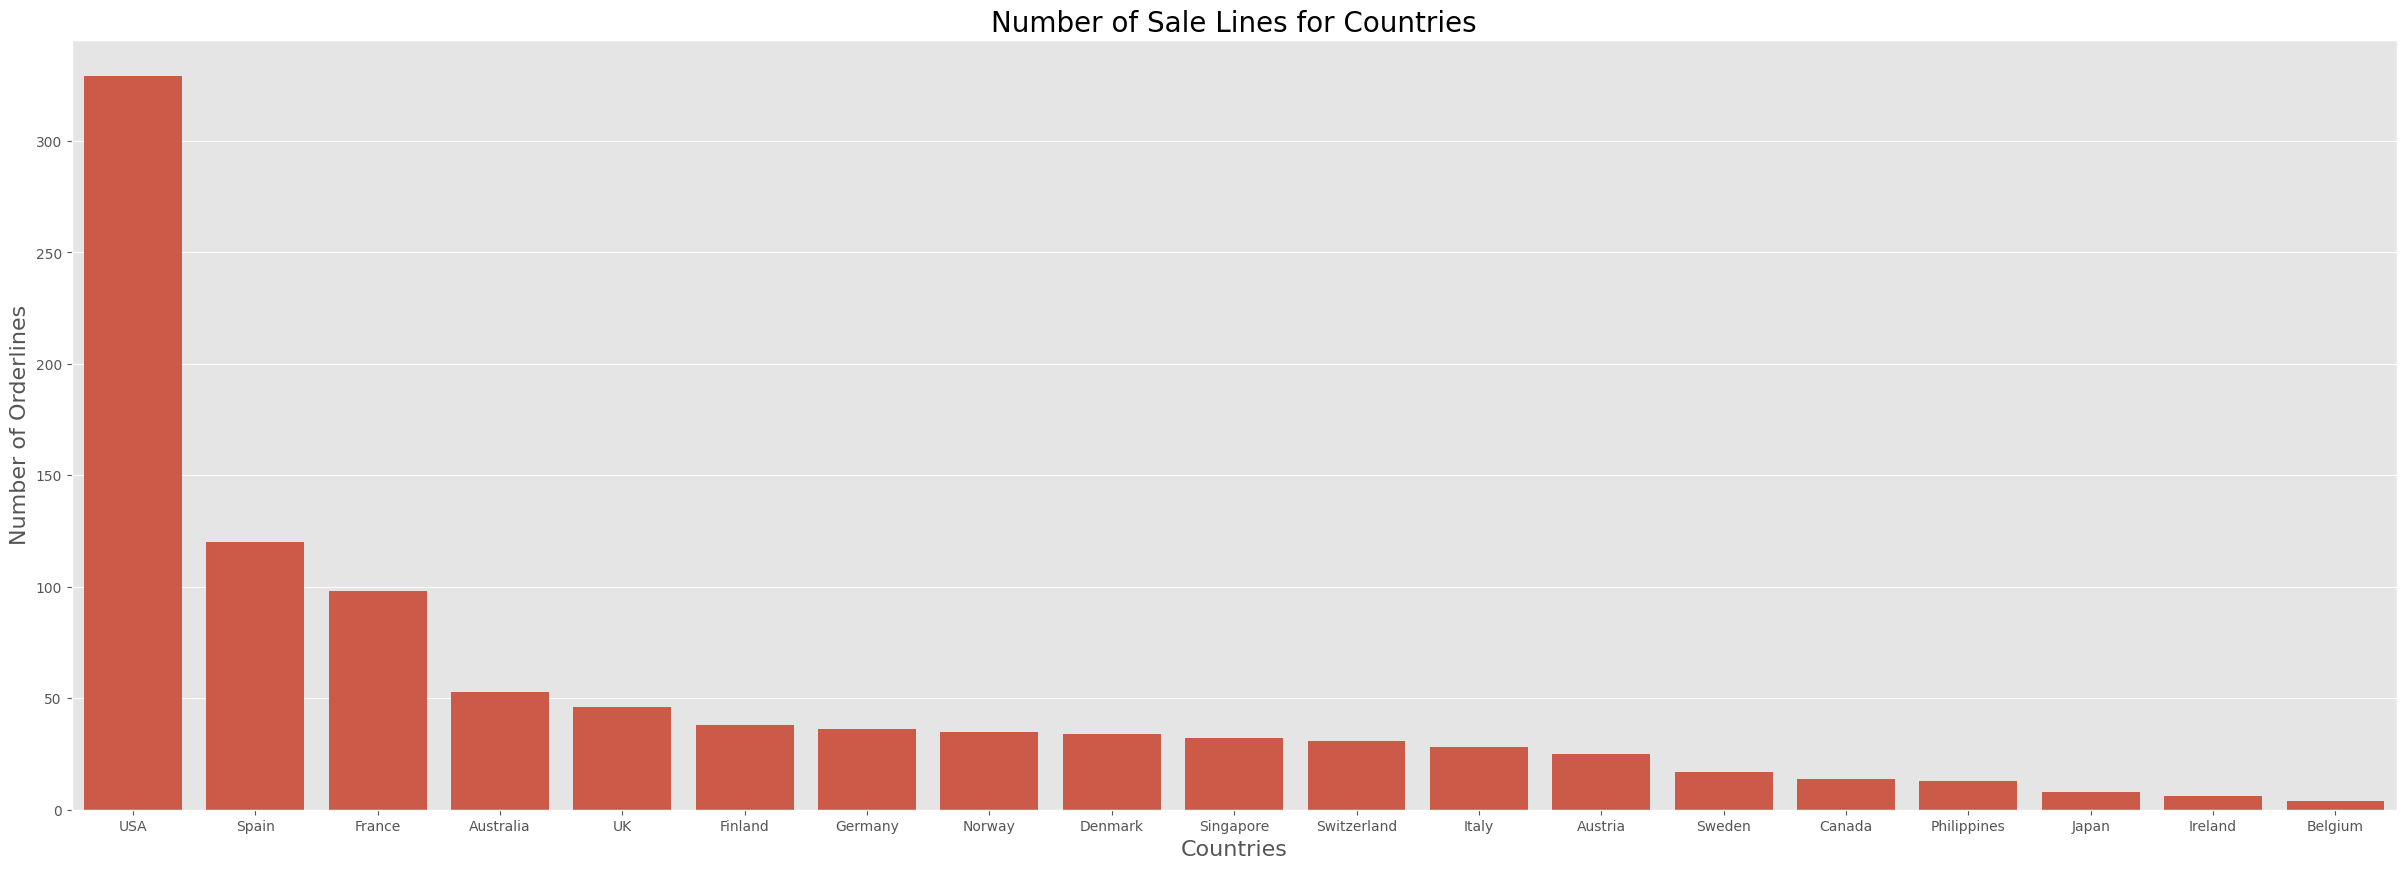

In [17]:

plt.figure(figsize=(30,10))
sns.countplot(x = sales1['country'], order = sales1['country'].value_counts().index )
plt.title('Number of Sale Lines for Countries', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.show()

<span style="font-size:18px;">The most of sales are happened at USA. Spain and France are the second and third most sold countries</span>

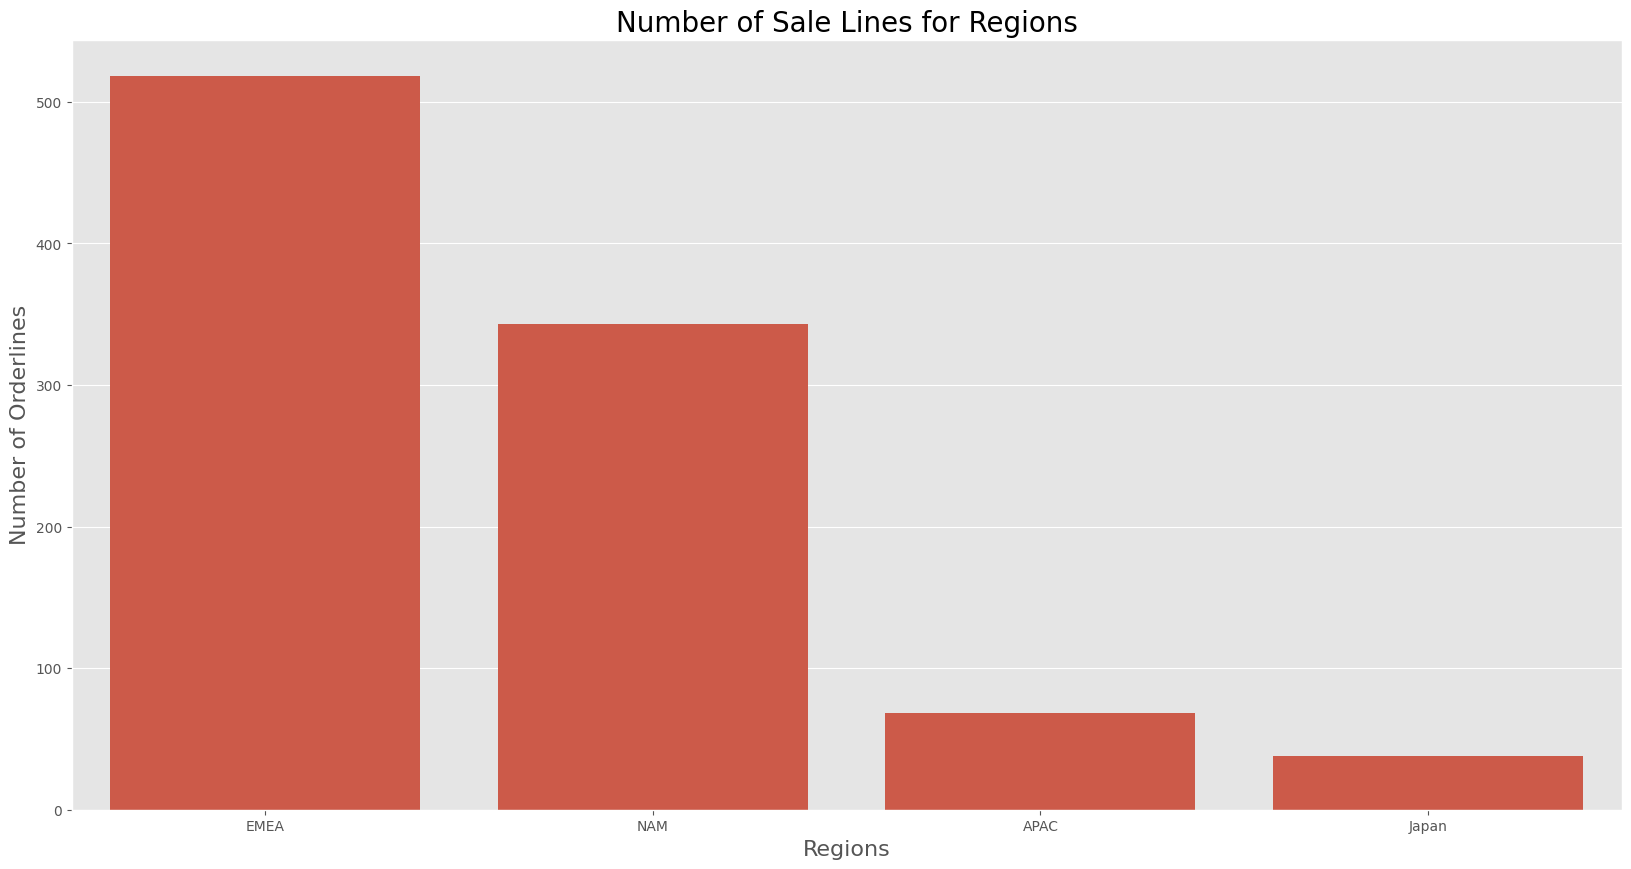

In [18]:

plt.figure(figsize=(20,10))
sns.countplot(x = sales1['territory'], order = sales1['territory'].value_counts().index )
plt.title('Number of Sale Lines for Regions', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Regions', fontsize = 16)
plt.show()

<span style="font-size:18px;">The most of sales are happened at EMEA region. The NAM region which USA is in it is the second most sold region.</span>

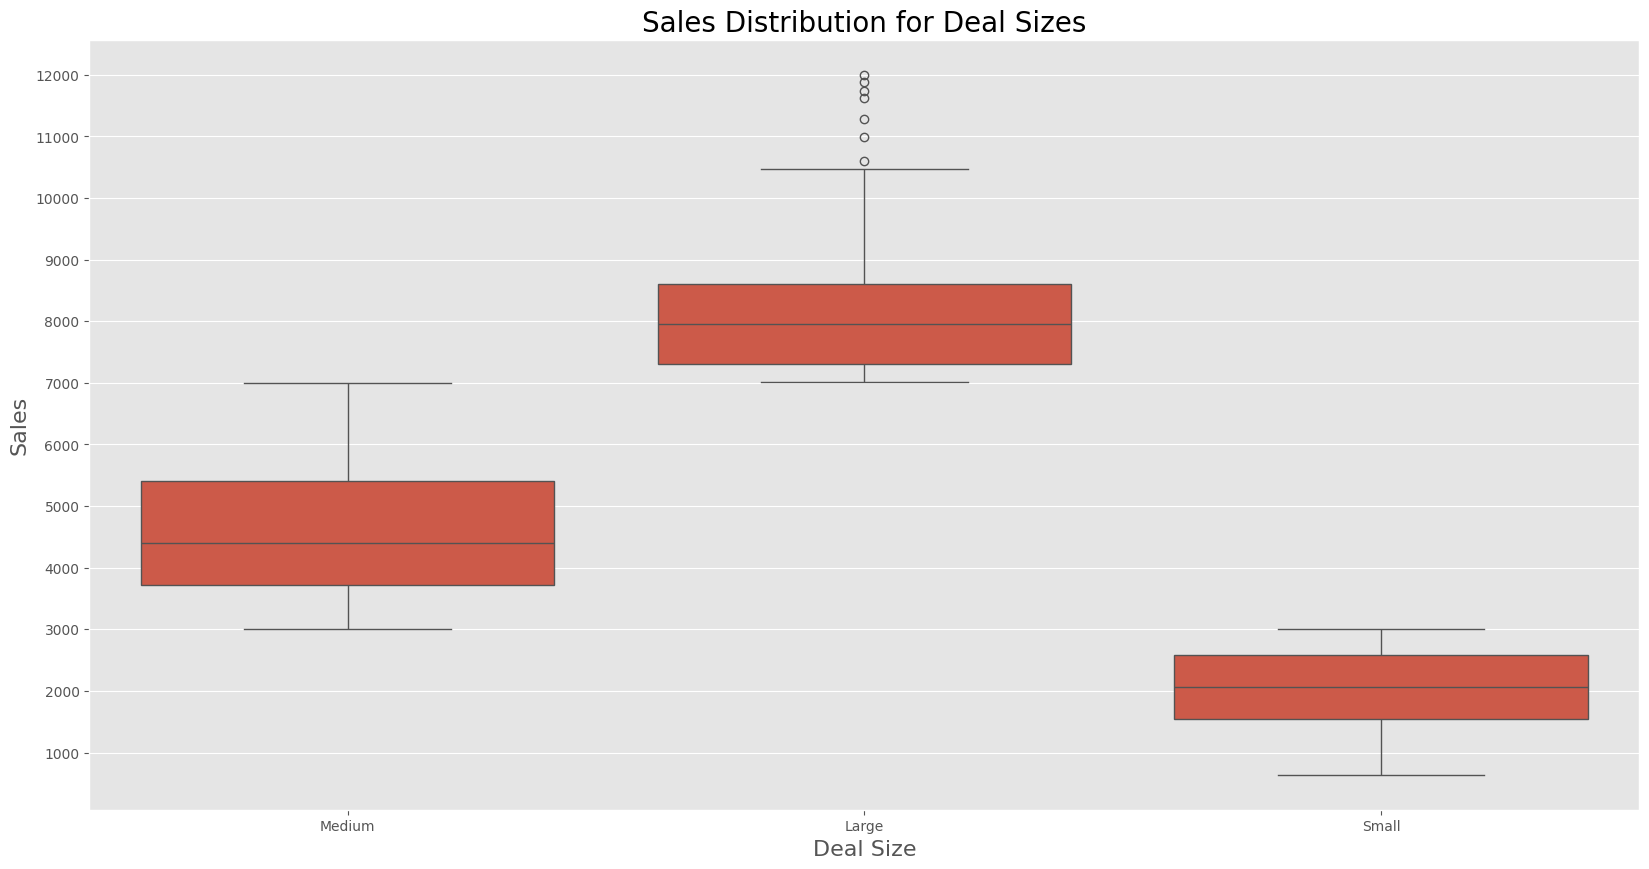

In [19]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,14000,1000))
sns.boxplot(x = sales1['dealsize'], y = sales1['sales'])
plt.title('Sales Distribution for Deal Sizes', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)
plt.xlabel('Deal Size', fontsize = 16)
plt.show()

<span style="font-size:18px;">Small sales are sales between 0 and 3000. Medium sales are sales between 3000 and 7000. Large sales are the sales higher than 7000.</span>

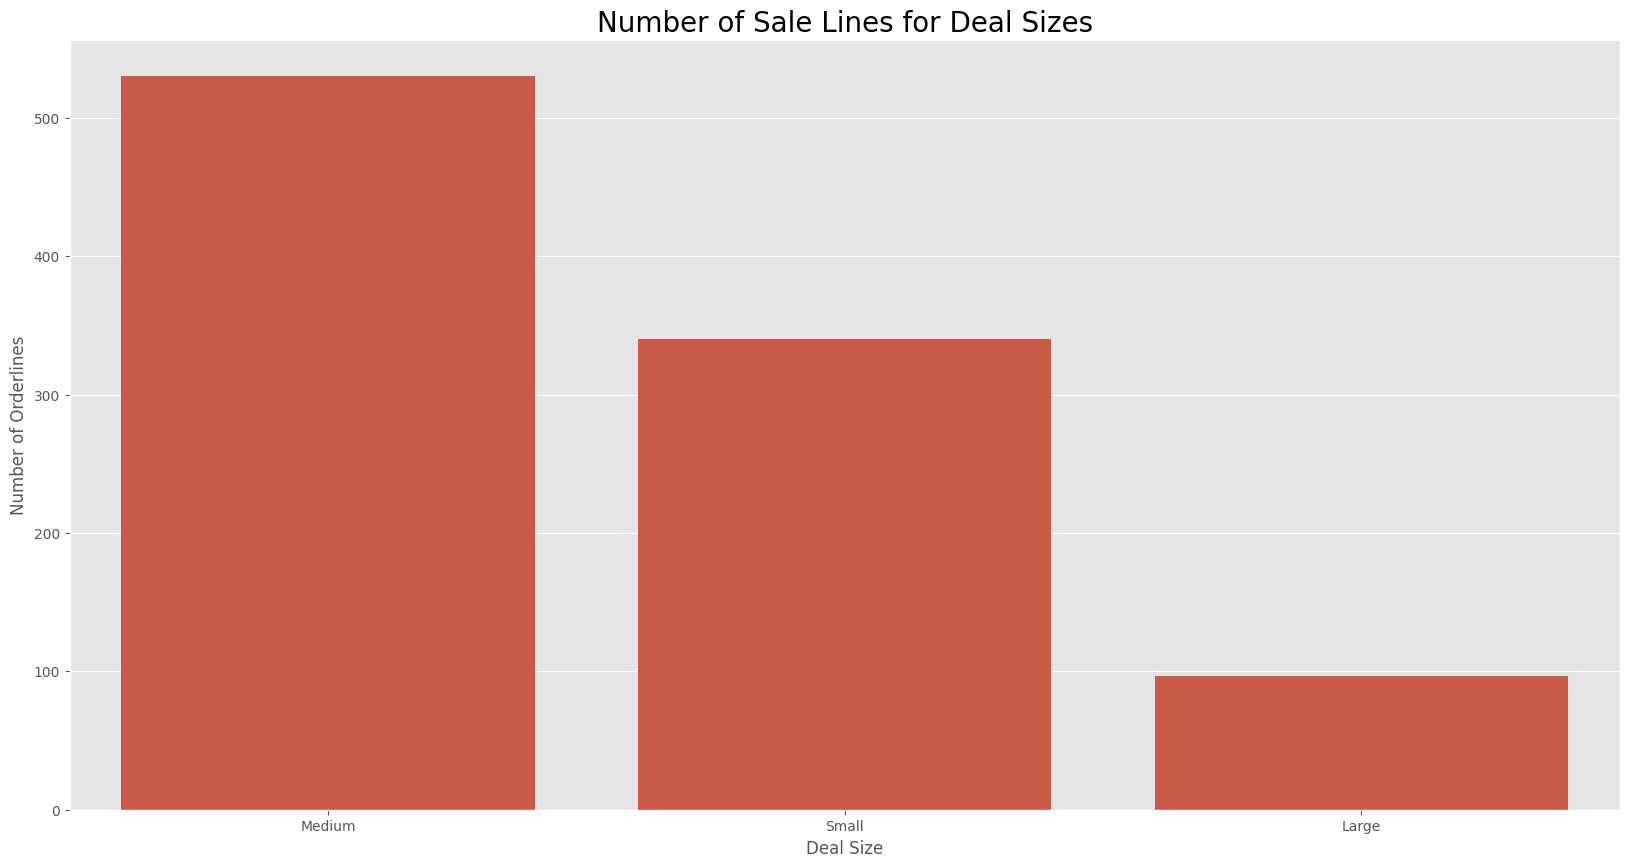

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x = sales1['dealsize'], order = sales1['dealsize'].value_counts().index )
plt.title('Number of Sale Lines for Deal Sizes', fontsize = 20)
plt.ylabel('Number of Orderlines')
plt.xlabel('Deal Size')
plt.show()

<span style="font-size:18px;">Small sales are sales between 0 and 3000. Medium sales are sales between 3000 and 7000. Large sales are the sales higher than 7000.</span>

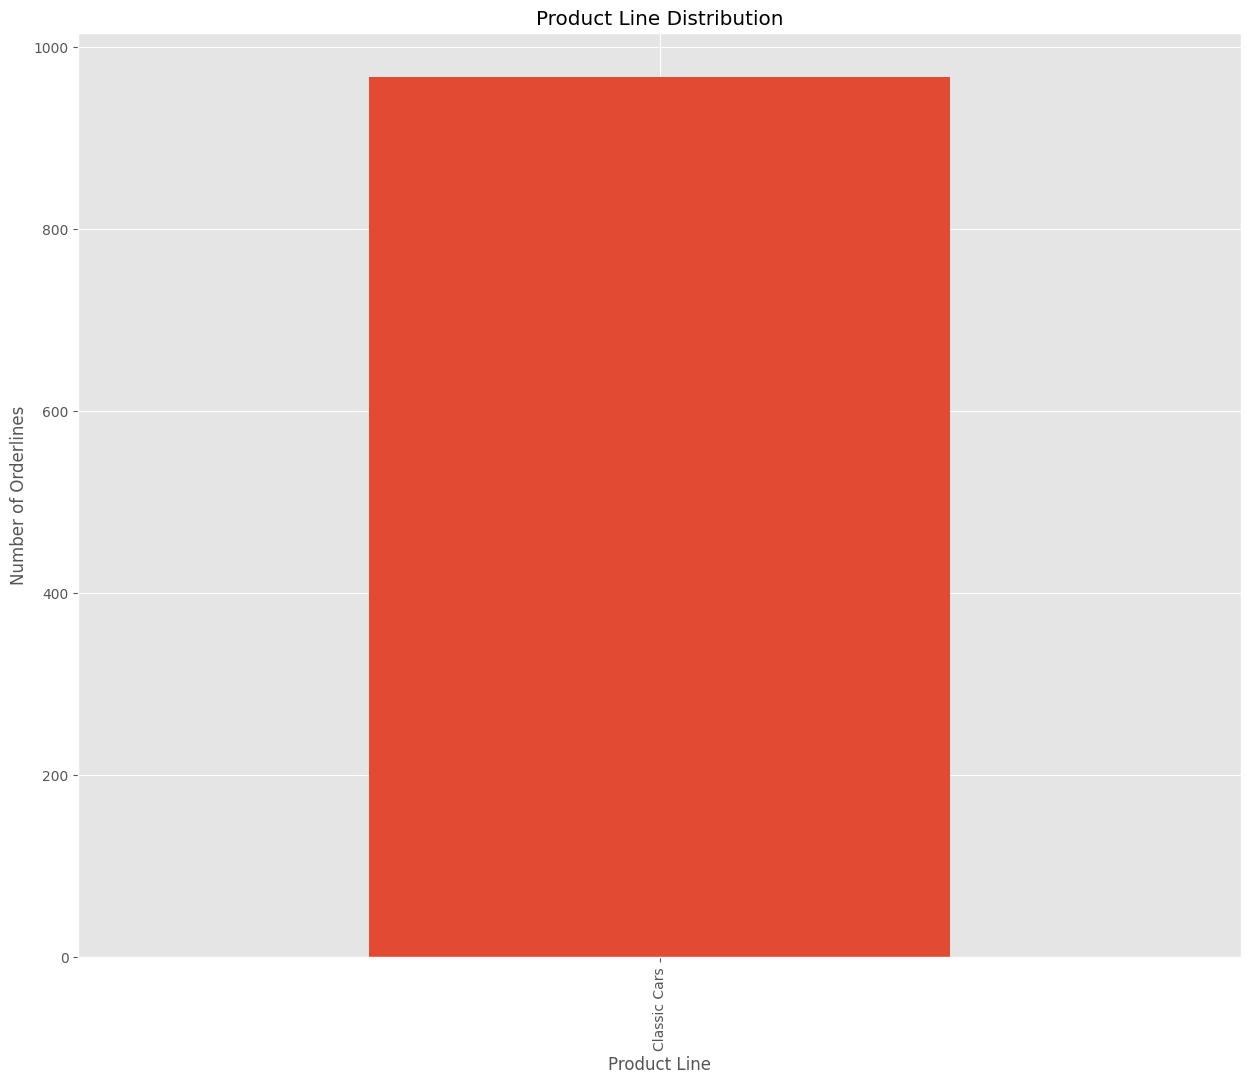

In [26]:
plt.figure(figsize=(15,12))
sales1['productline'].value_counts().plot(kind = 'bar')
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Number of Orderlines')
plt.show()

<span style="font-size:18px;">The most of the sales are belong Classic Cars category. Vintage Cars and Motorcycles are the second and third ones. The least of sales are happened in Trains category.</span>

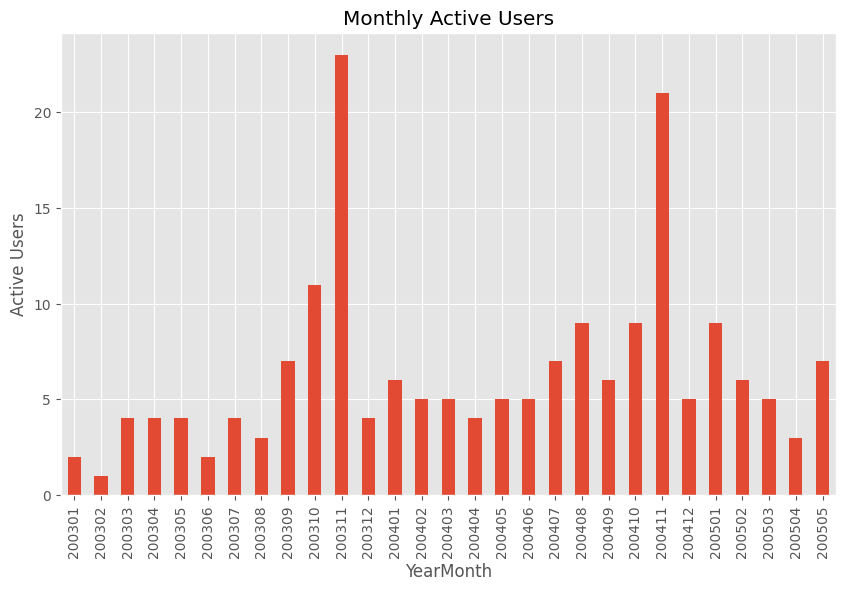

In [22]:
sales1['year_month'] = sales1['year_id'].map(str)+sales1['month_id'].map(str).map(lambda x: x.rjust(2,'0'))

plt.figure(figsize=(10,6))
sales1.groupby(['year_month'])['customername'].nunique().plot(kind='bar')
plt.title('Monthly Active Users')
plt.xlabel('YearMonth')
plt.ylabel('Active Users')
plt.show()

<span style="font-size:18px;">The monthly active users show similar trend to sales. The active users are peaked at most sold months.</span>

              discountrate     sales
discountrate      1.000000  0.316505
sales             0.316505  1.000000


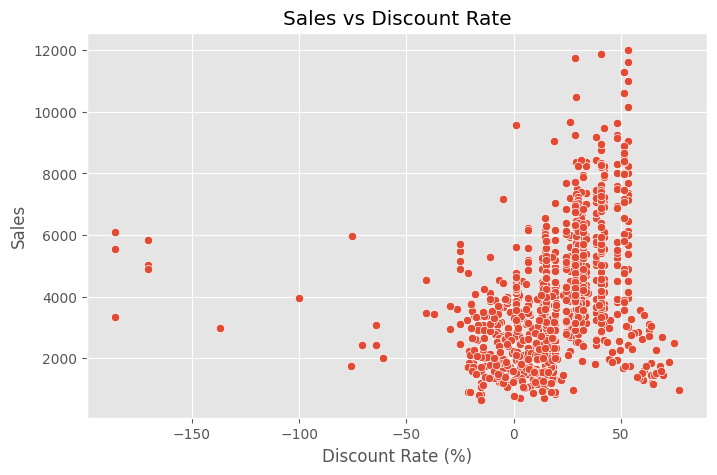

In [28]:
sales1['discountrate'] = ((sales1['msrp'] - sales1['priceeach']) / sales1['msrp']) * 100
print(sales1[['discountrate', 'sales']].corr())

plt.figure(figsize=(8,5))
sns.scatterplot(x='discountrate', y='sales', data=sales1)
plt.title('Sales vs Discount Rate')
plt.xlabel('Discount Rate (%)')
plt.ylabel('Sales')
plt.show()

## Insights & Conclusions

- **H1:** Confirmed — sales volume differs significantly across countries, with USA being a clear leader.
- **H2:** Confirmed — product lines vary in total sales, with 'Classic Cars' performing best.
- **H3:** Confirmed — 'Shipped' status orders have higher average sales.
- **H4:** Partially confirmed — there is a noticeable sales increase in the middle months of each year.

Further optimization could include forecasting, deeper customer segmentation, and profit margin analysis.

---

R² score: 0.369
Mean Absolute Error: 1292.40
Mean Squared Error: 2639829.99


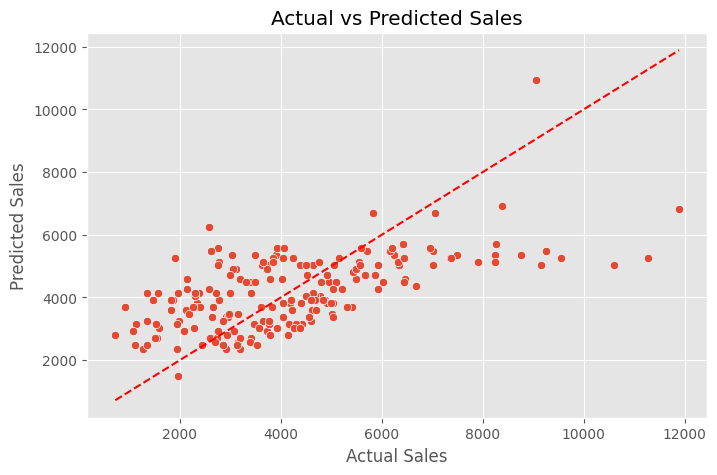

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = sales1[['quantityordered']]
y = sales1['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R² score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()
